# Calorimeter shower data:  comparison by particle type
#### The purpose of this notebook is to share a first analysis of the calorimeter data, focusing on differences in the showers generated by two particle types {proton vs. pion}.   
#### Please see the accompanying VizToolsUserGuide.ipynb for documentation and a quick walkthrough of the functions used for visualization.

In [96]:
import sys
sys.path.append('../scripts')
import data_loader
import viz_tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

data = data_loader.load('../data/test_data.h5')  # pull sample of 100 experiments
target = data['target'][:,:,0]              # grab the particle-type for each
ecal = data['ECAL'][:]                      # ecal data
particle0_index = np.where((target==0))[0]  # indices of particle==pion runs
particle1_index = np.where((target==1))[0]  # indices of particle==proton runs
single_0 = ecal[particle0_index[1],:,:,:]   # a single particle==pion run.  Momentum=168
single_1 = ecal[particle1_index[1],:,:,:]   # a single particle==photon run. Momentum=159 (close to single_0)
all_0 = ecal[particle0_index,:,:,:]         # extract only particle==pion runs
all_1 = ecal[particle1_index,:,:,:]         # extract only particle==proton runs
mu_0 = all_0.mean(0)                        # average run for particle==pion
mu_1 = all_1.mean(0)                        # average run for particle==photon

Loading data from ../data/test_data.h5


## Data Skew
About 93% of the values across the shower-tensor for any experiment are 0.
In other words, out of the 14400 (24x24x25) entries in the 3D shower-tensor, only about 1000 are non-zero.
For the non-zero values, the data is extremely skewed with lots of the total energy measured coming from just a few enteries.

### Distribution of energy excluding zeros: for a single run, by particle type

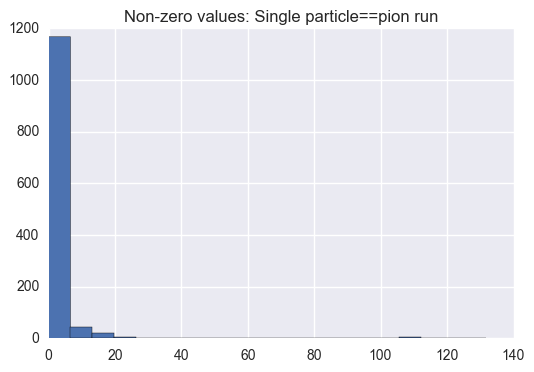

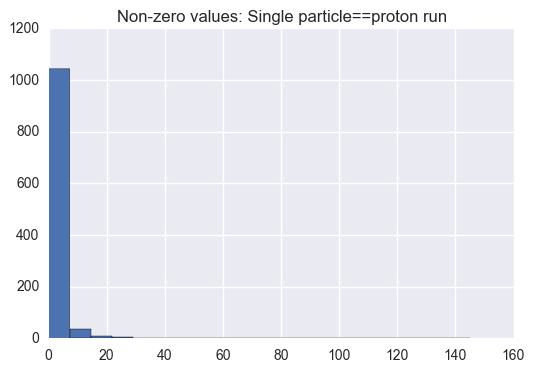

In [97]:
single0_pos = single_0.ravel()[single_0.ravel()>0]
single1_pos = single_1.ravel()[single_1.ravel()>0]

plt.hist(single0_pos, bins=20)
plt.title('Non-zero values: Single particle==pion run')
plt.show()
plt.hist(single1_pos, bins=20)
plt.title('Non-zero values: Single particle==proton run')
plt.show()

### Another way to see this skew is to measure how much of total energy measured is attributed to the top K values

In [98]:
def topK(array, K):
    return 100*round((array[array.argsort()[-K:]].sum())/float(array.sum()),2) 

#### For the average experiment

In [99]:
print '[particle==pion] highest 5  values account for {}% of total energy'.format(topK(mu_0.ravel(), 5)) 
print '[particle==pion] highest 10 values account for {}% of total energy'.format(topK(mu_0.ravel(), 10)) 
print '[particle==pion] highest 15 values account for {}% of total energy'.format(topK(mu_0.ravel(), 15)) 
print ''
print '[particle==proton] highest 5  values account for {}% of total energy'.format(topK(mu_1.ravel(), 5)) 
print '[particle==proton] highest 10 values account for {}% of total energy'.format(topK(mu_1.ravel(), 10)) 
print '[particle==proton] highest 15 values account for {}% of total energy'.format(topK(mu_1.ravel(), 15))

[particle==pion] highest 5  values account for 8.0% of total energy
[particle==pion] highest 10 values account for 15.0% of total energy
[particle==pion] highest 15 values account for 21.0% of total energy

[particle==proton] highest 5  values account for 7.0% of total energy
[particle==proton] highest 10 values account for 14.0% of total energy
[particle==proton] highest 15 values account for 21.0% of total energy


#### For a single experiment

In [100]:
print '[particle==pion] highest 5  values account for {}% of total energy'.format(topK(single_0.ravel(), 5)) 
print '[particle==pion] highest 10 values account for {}% of total energy'.format(topK(single_0.ravel(), 10)) 
print '[particle==pion] highest 15 values account for {}% of total energy'.format(topK(single_0.ravel(), 15)) 
print ''
print '[particle==proton] highest 5  values account for {}% of total energy'.format(topK(single_1.ravel(), 5)) 
print '[particle==proton] highest 10 values account for {}% of total energy'.format(topK(single_1.ravel(), 10)) 
print '[particle==proton] highest 15 values account for {}% of total energy'.format(topK(single_1.ravel(), 15))

[particle==pion] highest 5  values account for 19.0% of total energy
[particle==pion] highest 10 values account for 35.0% of total energy
[particle==pion] highest 15 values account for 43.0% of total energy

[particle==proton] highest 5  values account for 24.0% of total energy
[particle==proton] highest 10 values account for 39.0% of total energy
[particle==proton] highest 15 values account for 46.0% of total energy


### Does one particle generate more energy overall

In [101]:
def sum_per_experiment(tensor):
    totals = [tensor[i,:,:,:].sum() for i in range(tensor.shape[0])]
    print pd.Series(totals).describe()
    pd.Series(totals).hist()

Distribution for total energy measured for pion runs
count      47.000000
mean     5095.518135
std      2361.499329
min       989.088108
25%      2886.644416
50%      5312.181108
75%      7396.173622
max      8671.241452
dtype: float64


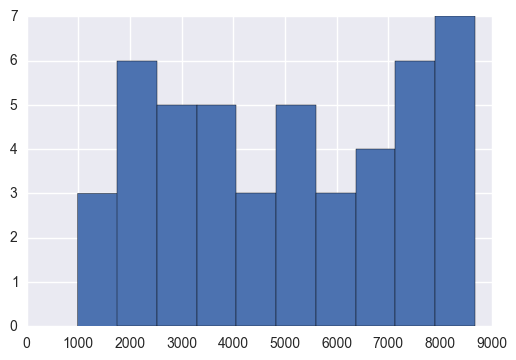

In [102]:
print "Distribution for total energy measured for pion runs"
sum_per_experiment(all_0)

Distribution for total energy measured for proton runs
count      53.000000
mean     4140.141247
std      2439.598974
min       277.743825
25%      2601.563901
50%      3404.234647
75%      6412.229447
max      8990.516051
dtype: float64


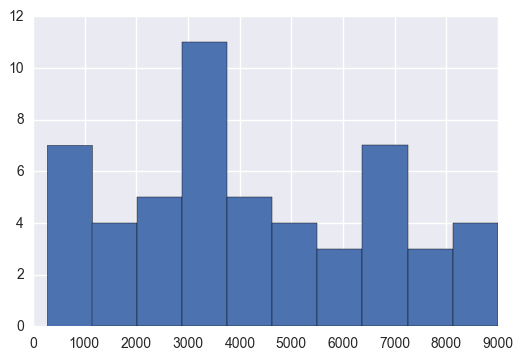

In [103]:
print "Distribution for total energy measured for proton runs"
sum_per_experiment(all_1)

## Single-axis signatures
Let's see if the distribution of energy measured at different index locations differ by particle type.
Note that the plots below use the experiment averages.


### X-axis

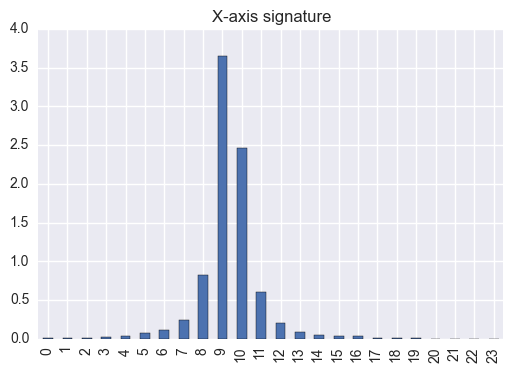

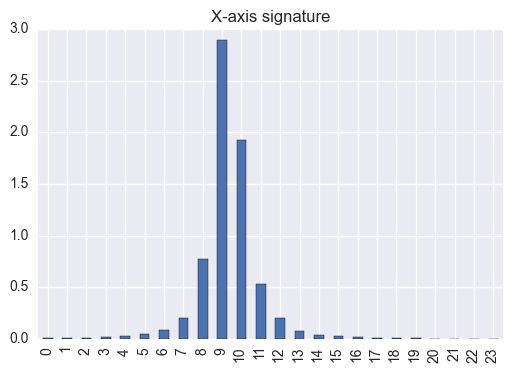

In [104]:
viz_tools.hist_by_dim(mu_0,0)
viz_tools.hist_by_dim(mu_1,0)

### Y-axis

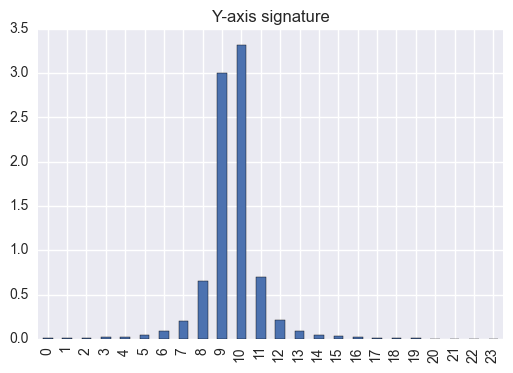

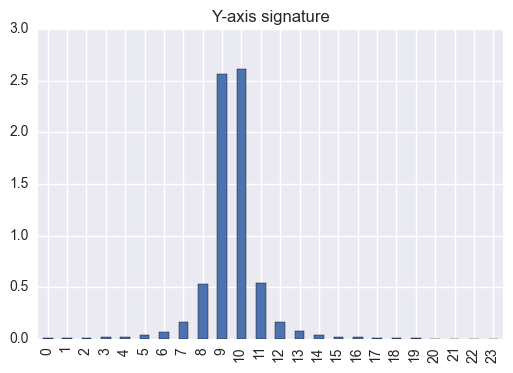

In [105]:
viz_tools.hist_by_dim(mu_0,1)
viz_tools.hist_by_dim(mu_1,1)

### Z-axis

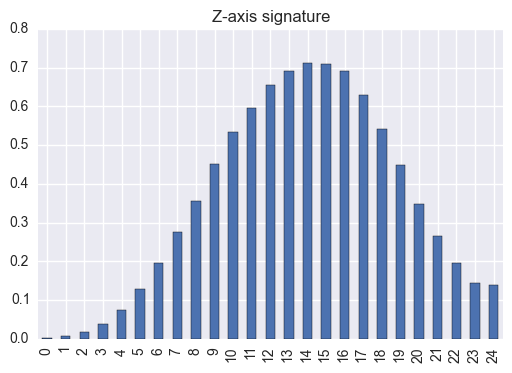

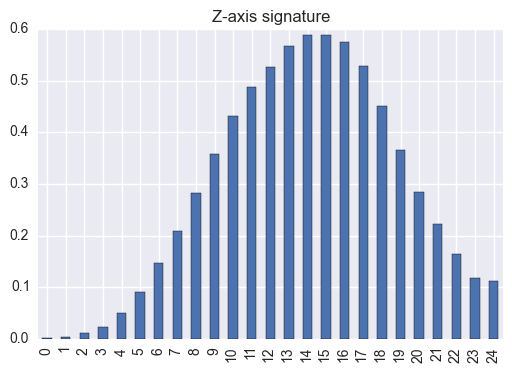

In [106]:
viz_tools.hist_by_dim(mu_0,2)
viz_tools.hist_by_dim(mu_1,2)

## 2-axis signatures
Let's see if the distribution of energy measured at different index locations differ by particle type.
Note that the plots below use the experiment averages.  
Please see the accompanying VizToolsUserGuide.ipynb for details on the ```scaling_root``` used for these plots.

### Collapse Z-axis

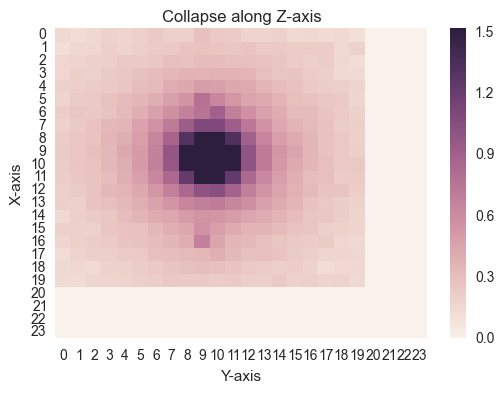

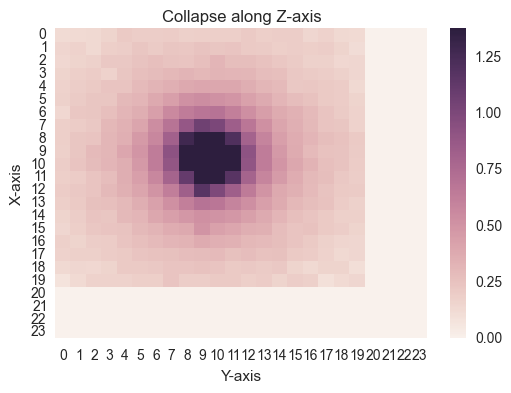

In [107]:
viz_tools.collapse_axis_heatmap(mu_0,2, scaling_root=3)
viz_tools.collapse_axis_heatmap(mu_1,2, scaling_root=3)

### Collapse Y-axis

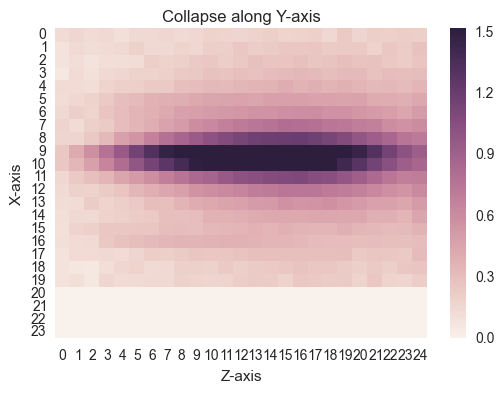

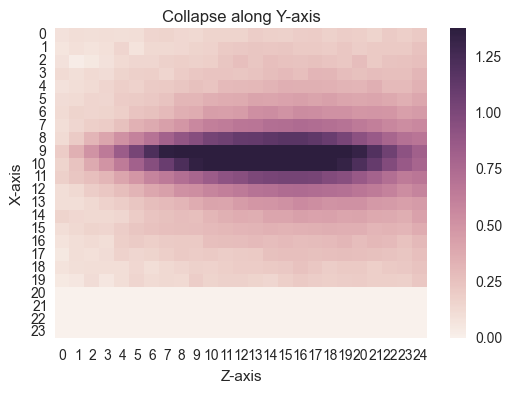

In [108]:
viz_tools.collapse_axis_heatmap(mu_0,1, scaling_root=3)
viz_tools.collapse_axis_heatmap(mu_1,1, scaling_root=3)

### Collapse X-axis

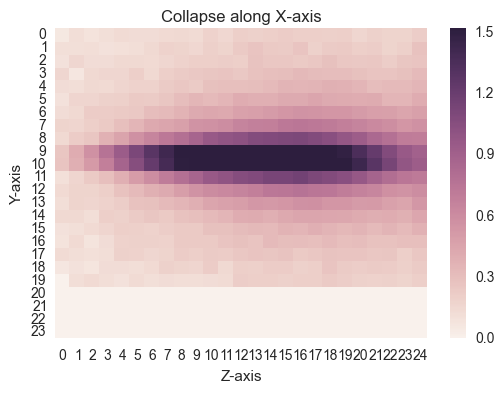

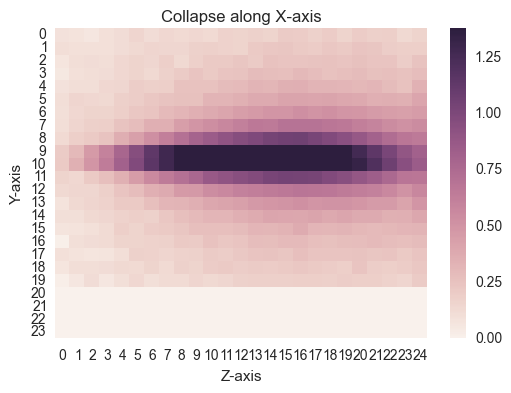

In [109]:
viz_tools.collapse_axis_heatmap(mu_0,0, scaling_root=3)
viz_tools.collapse_axis_heatmap(mu_1,0, scaling_root=3)

### The plots above do not indicate that there is obvious difference between the showers created by the different particles. Let's try taking a look at the highest energy value slice/index along the Z (time) dimension.

#### For a single experiment

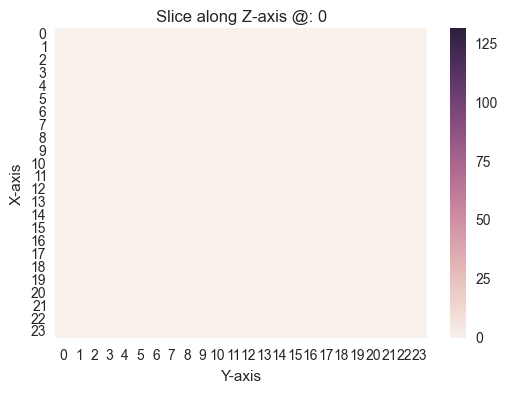

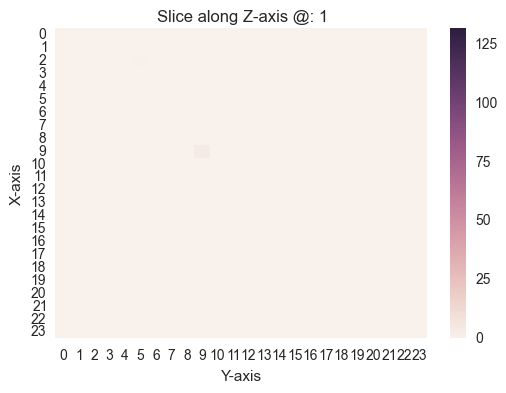

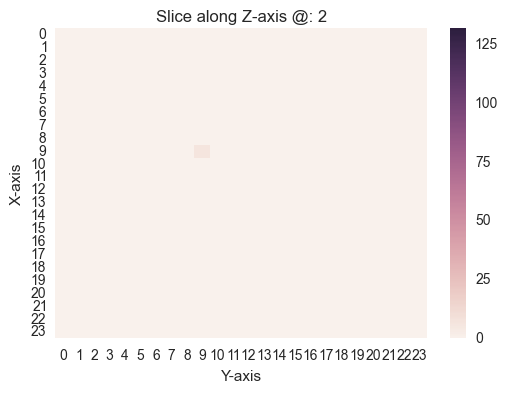

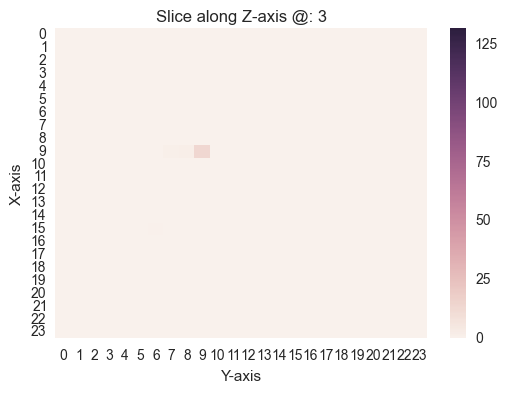

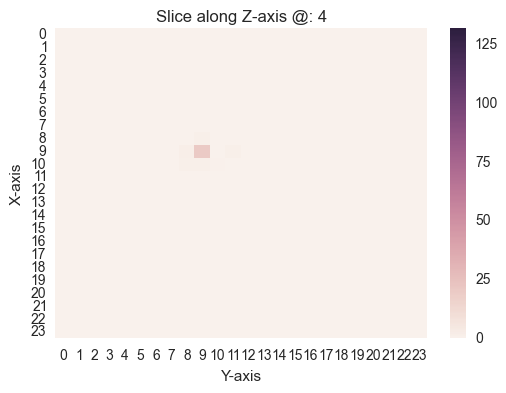

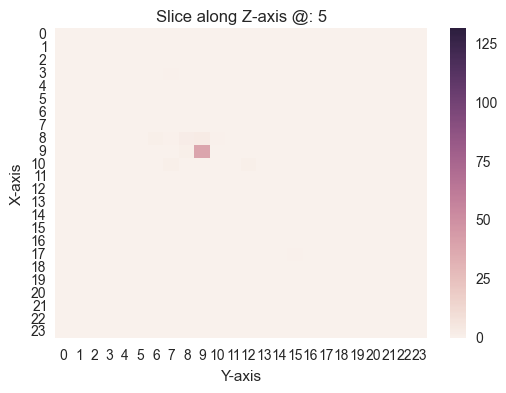

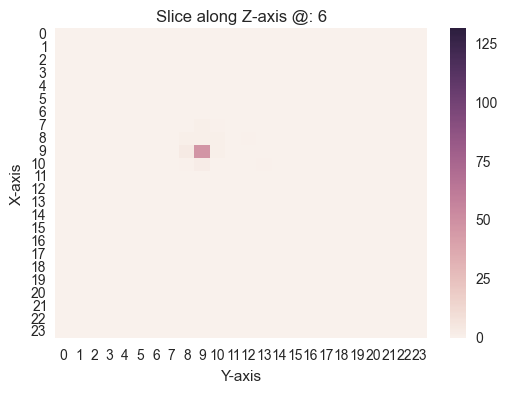

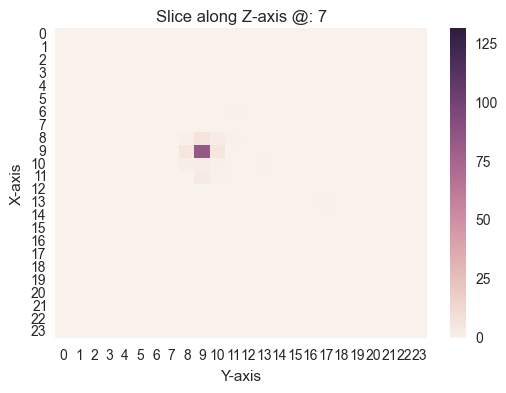

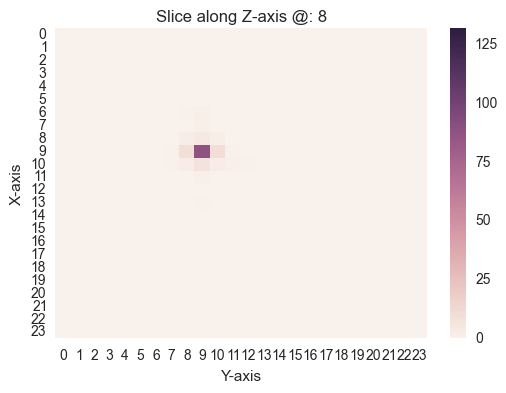

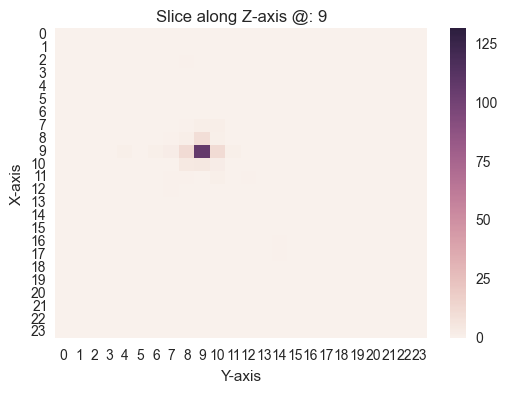

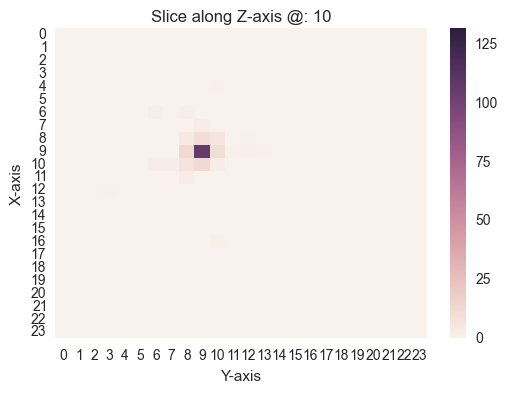

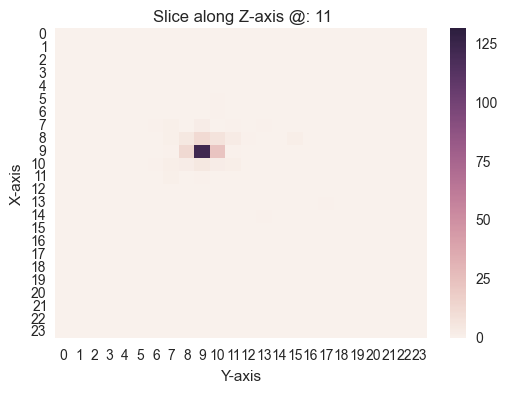

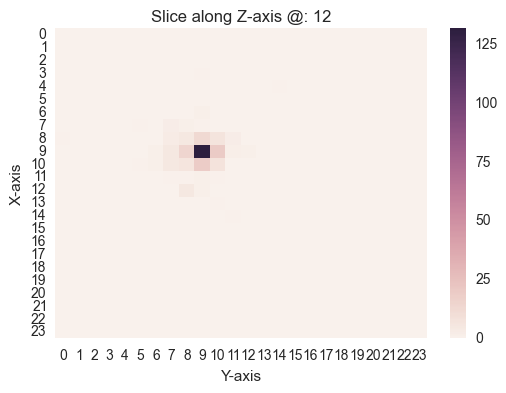

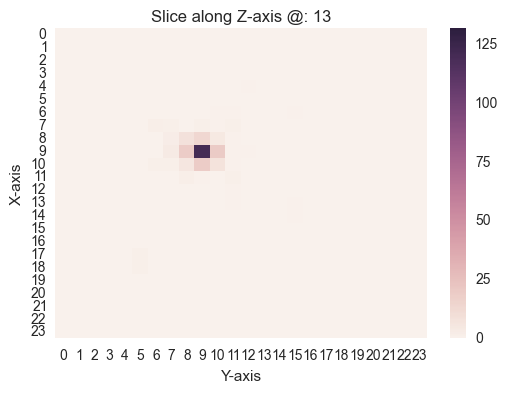

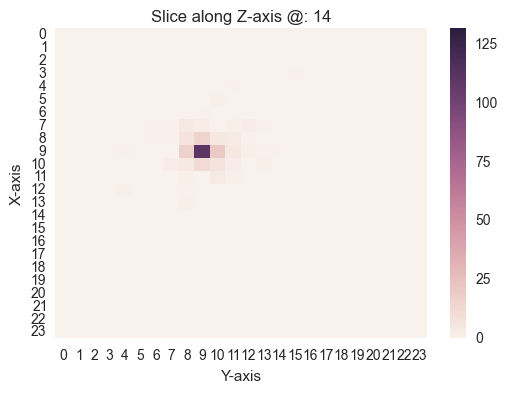

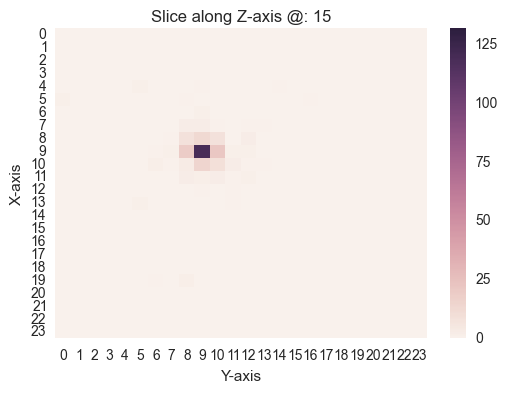

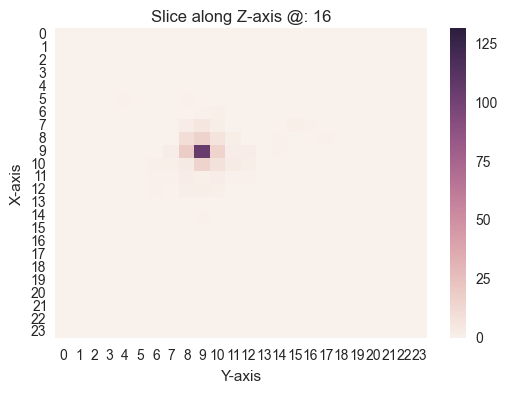

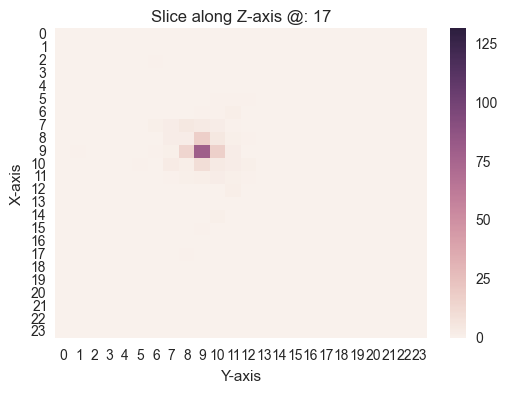

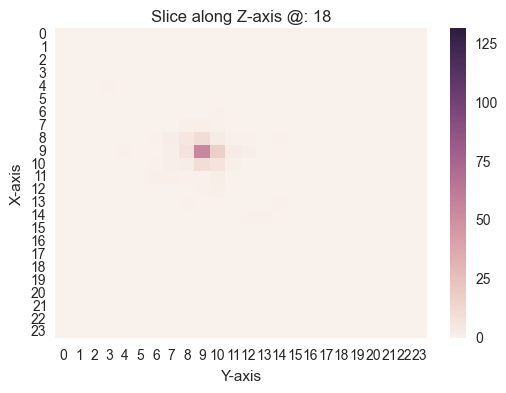

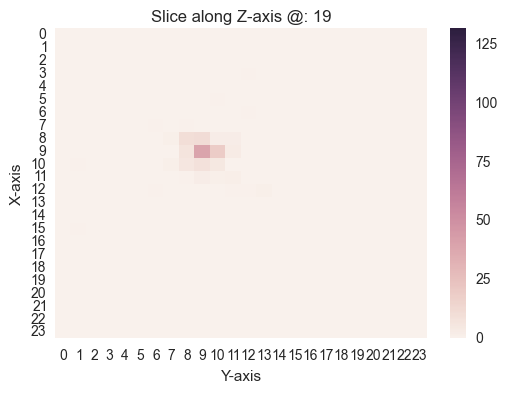

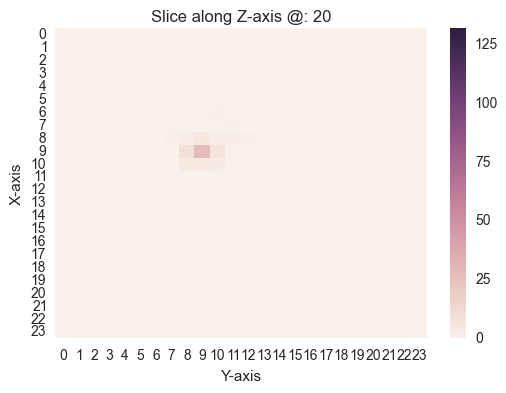

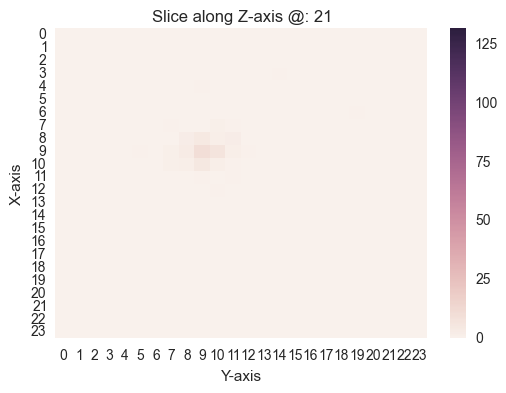

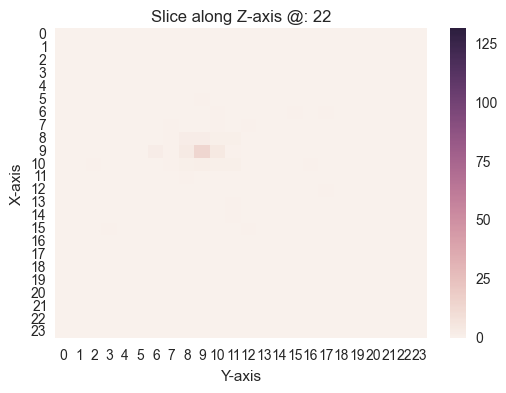

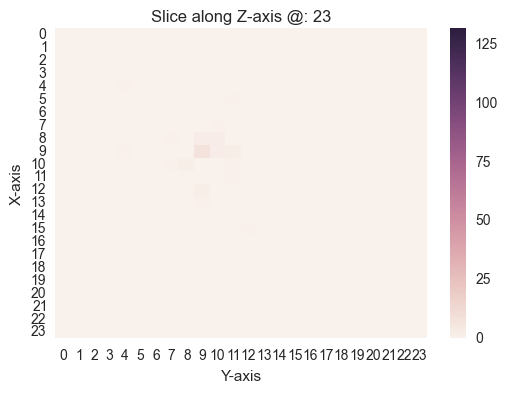

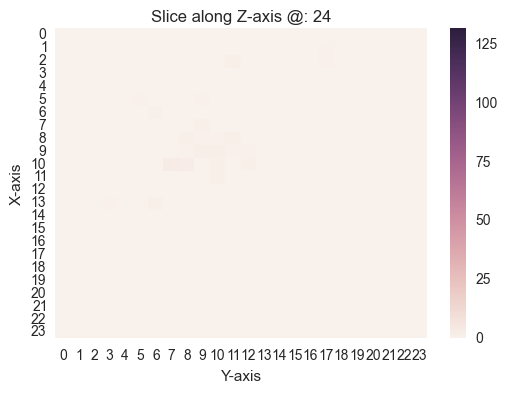

In [115]:
viz_tools.slice_axis_heatmap(single_0, 2, scaling_root=1)

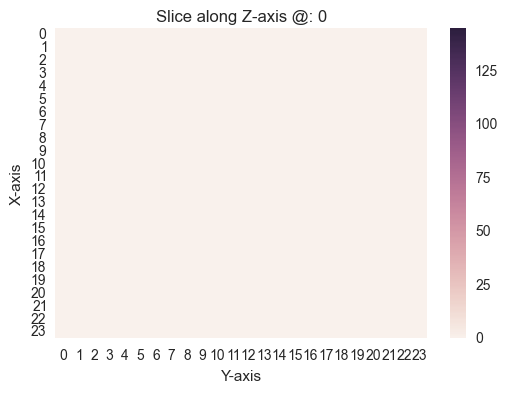

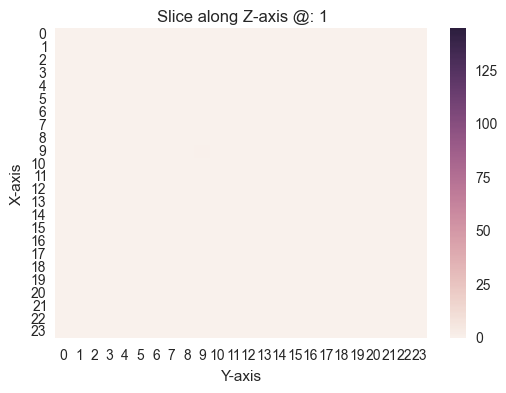

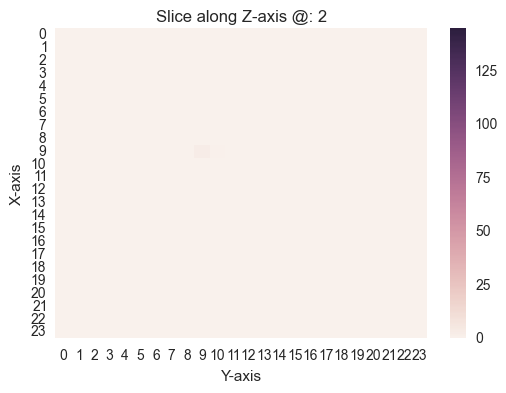

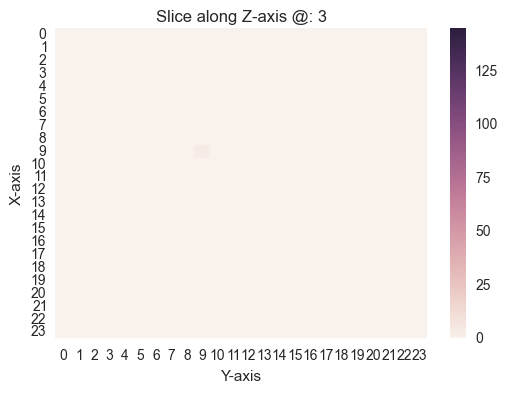

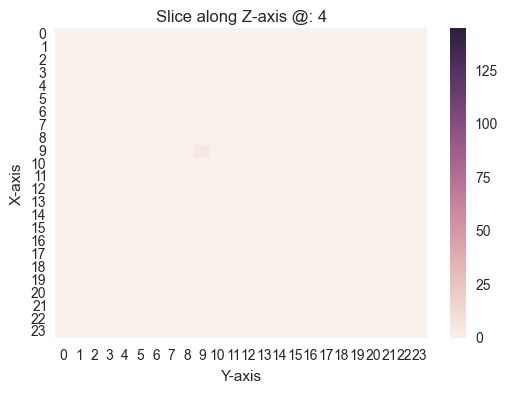

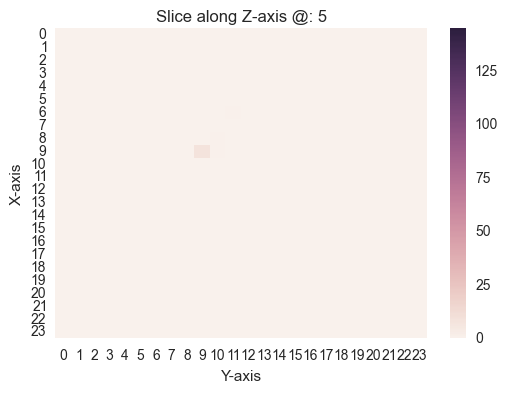

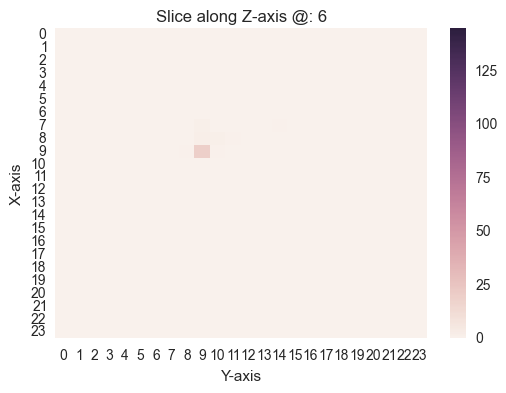

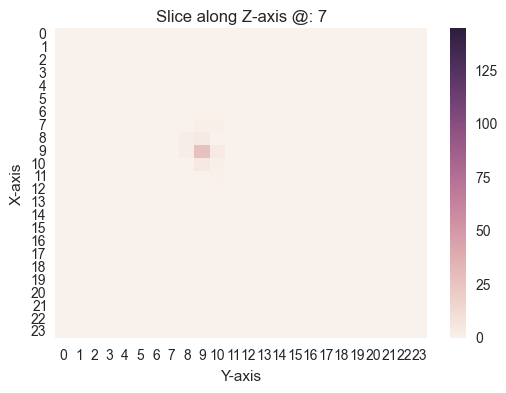

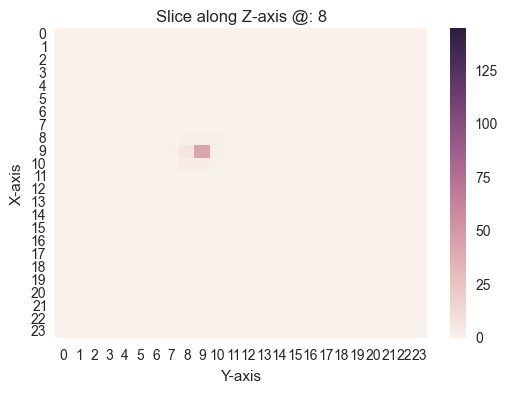

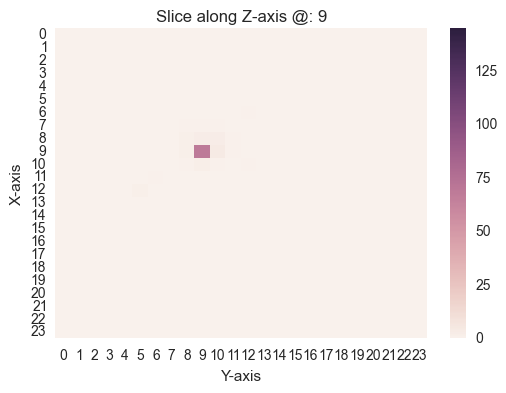

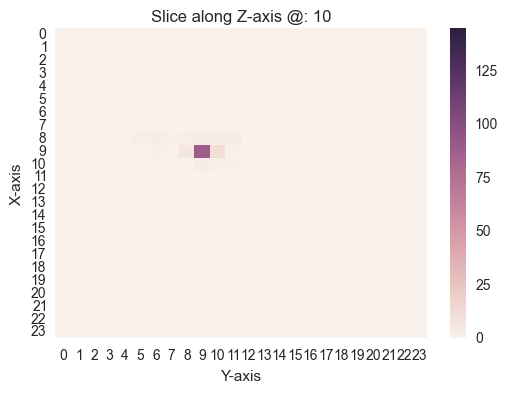

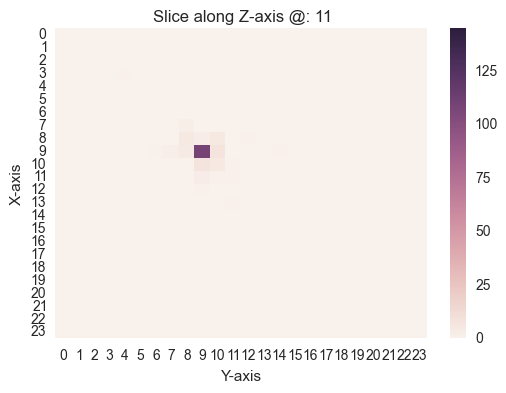

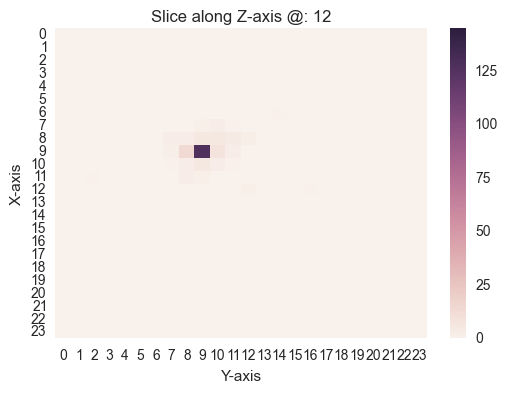

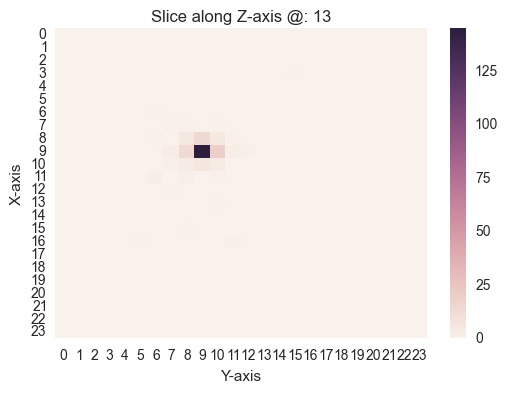

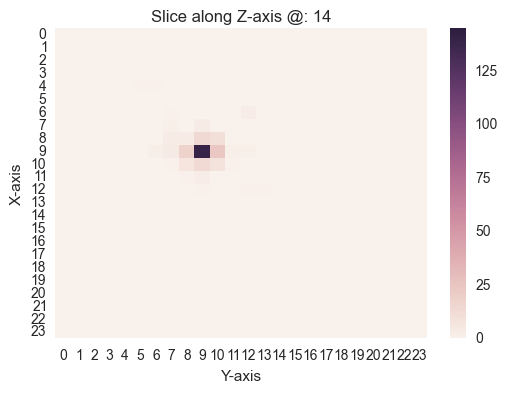

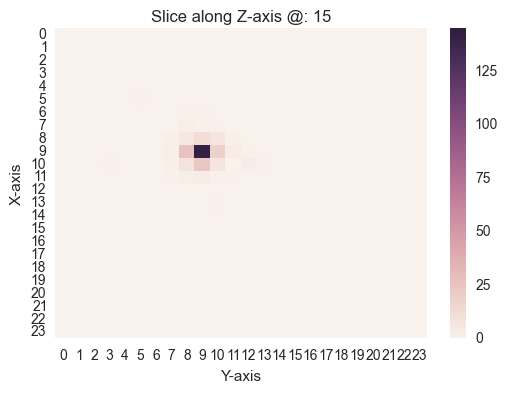

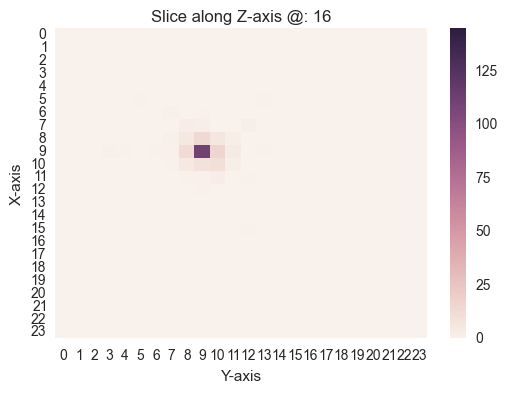

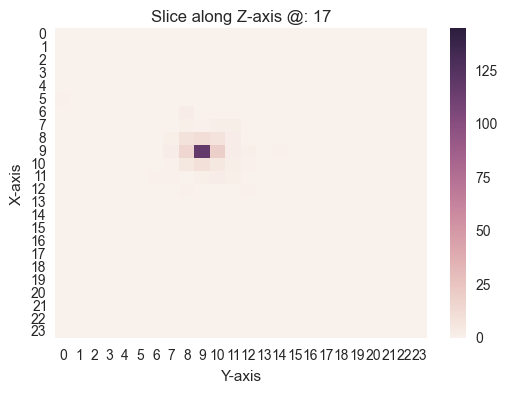

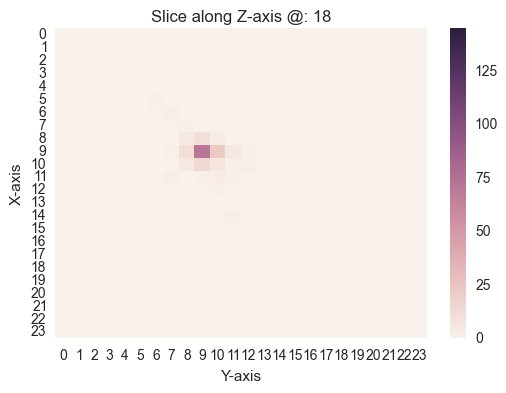

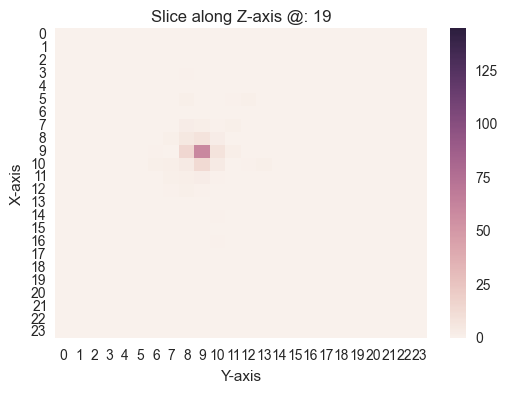

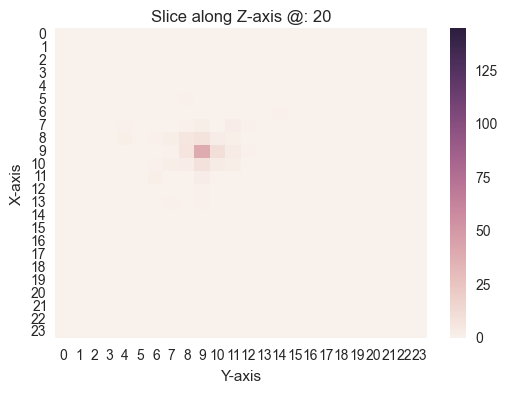

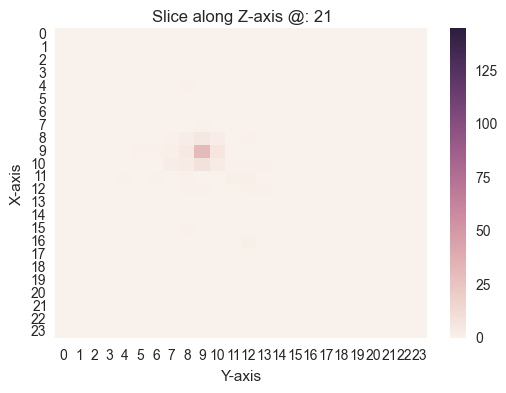

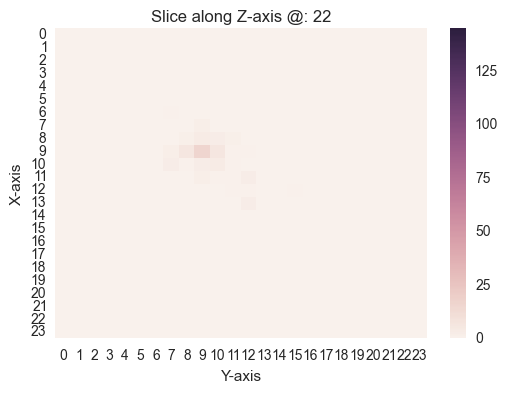

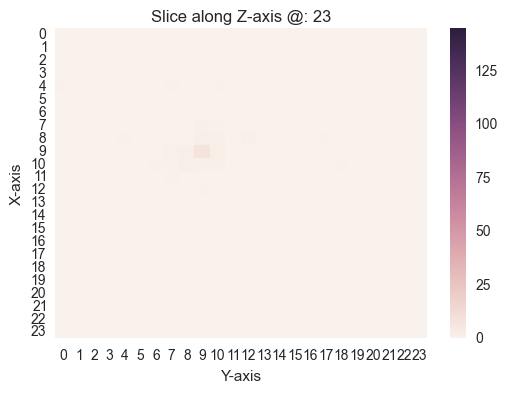

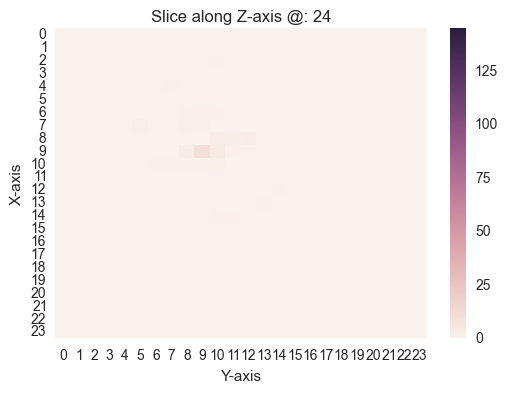

In [116]:
viz_tools.slice_axis_heatmap(single_1, 2, scaling_root=1)

#### For an average experiment

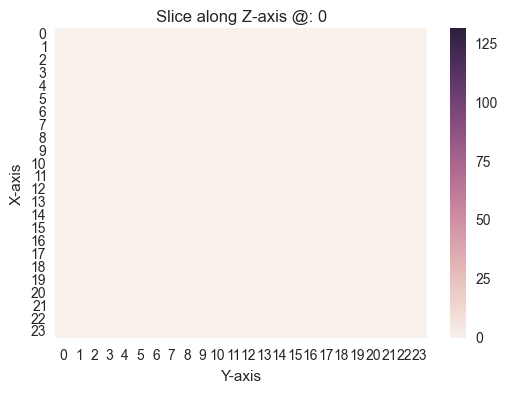

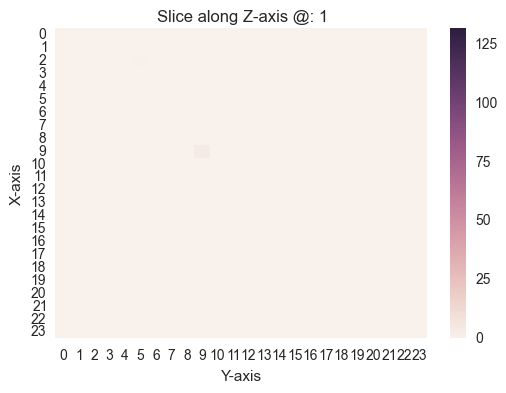

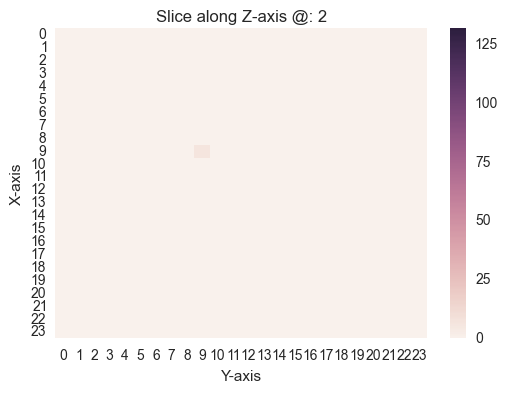

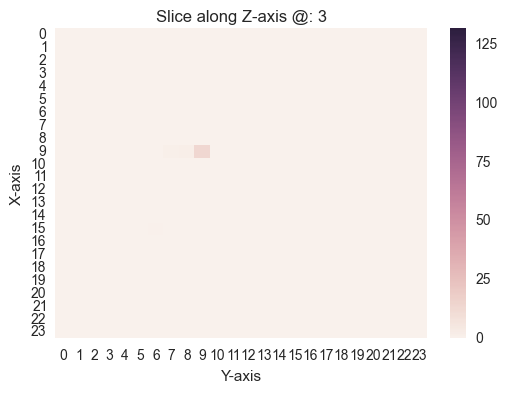

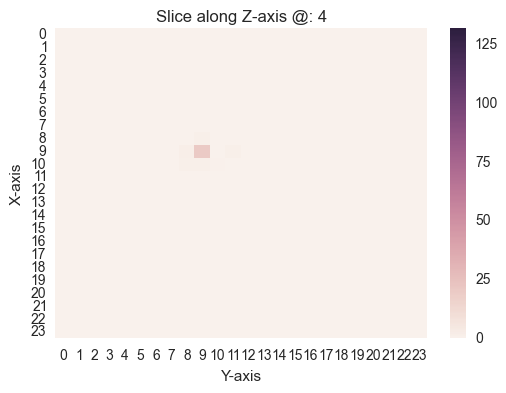

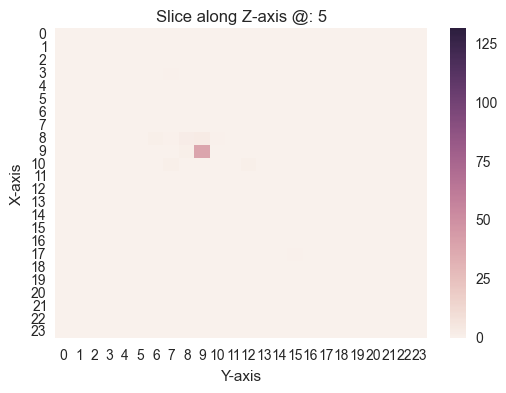

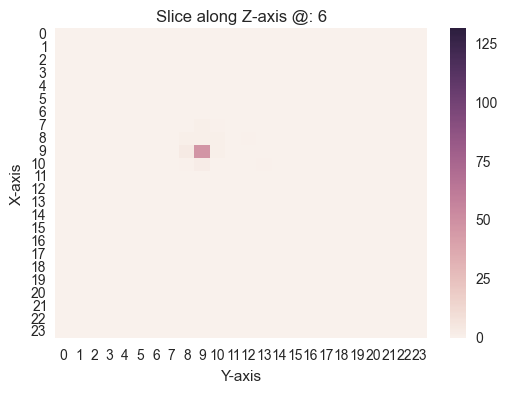

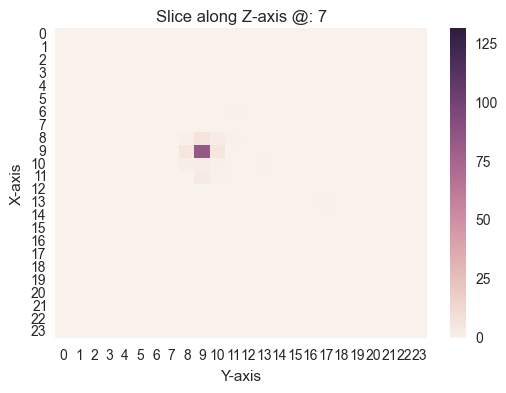

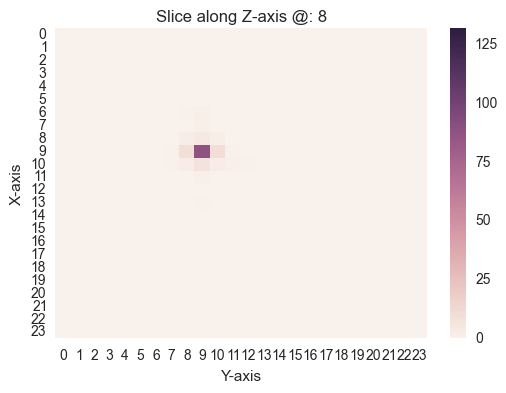

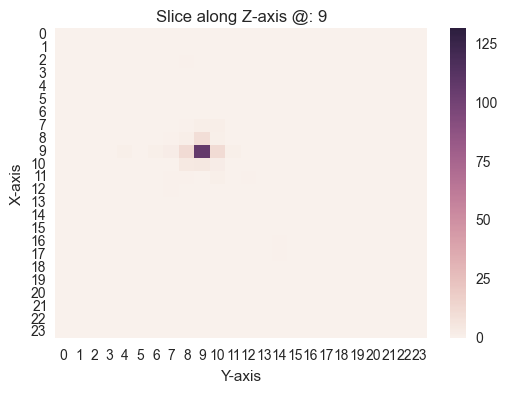

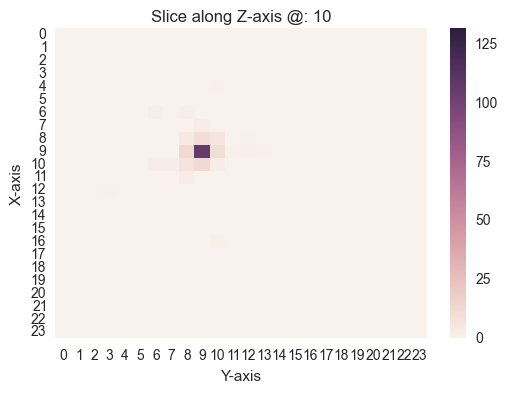

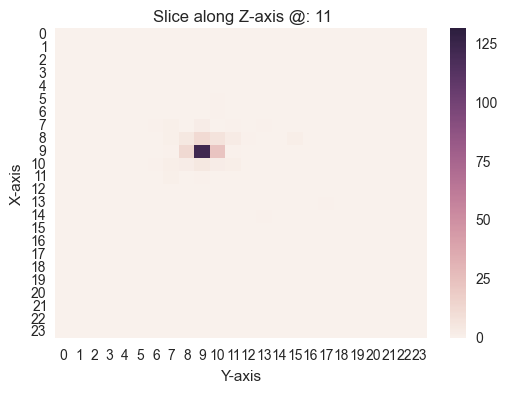

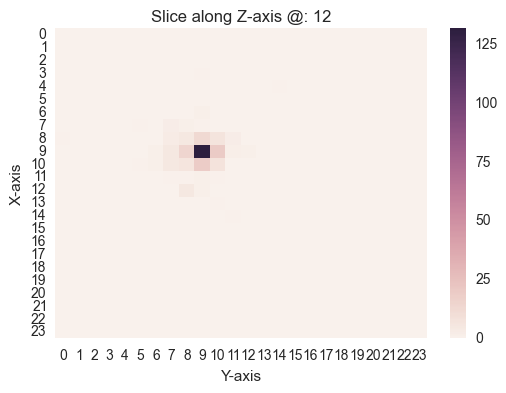

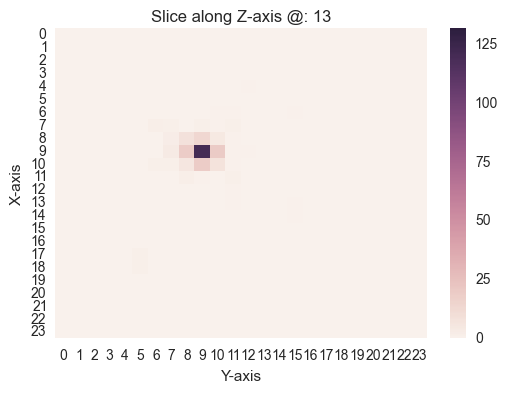

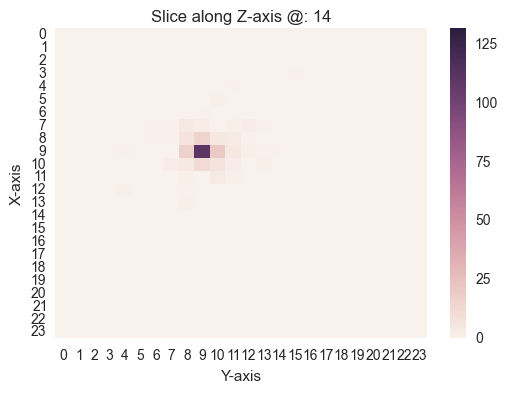

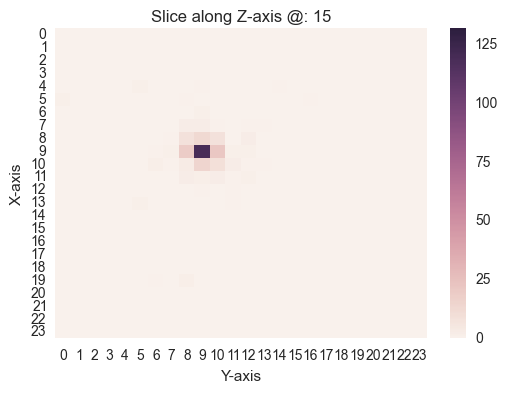

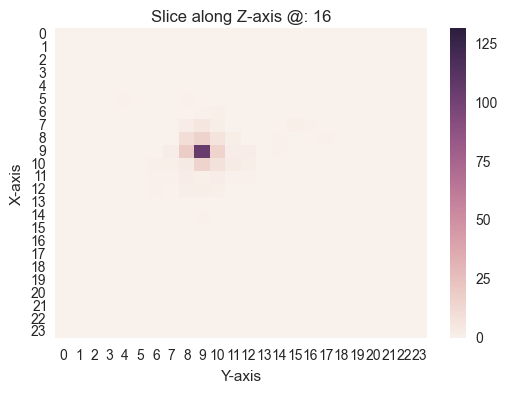

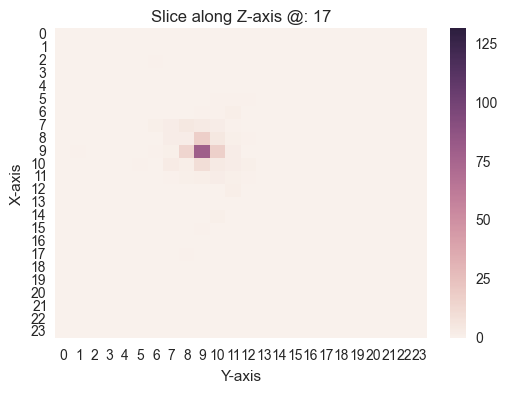

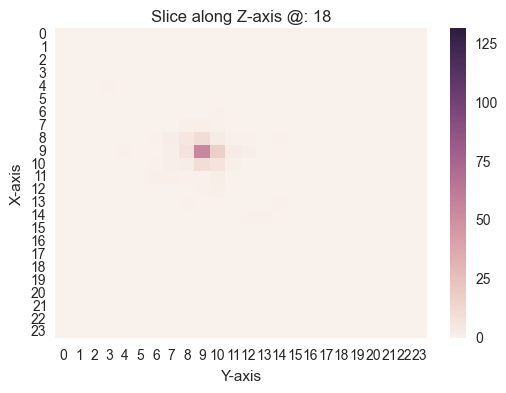

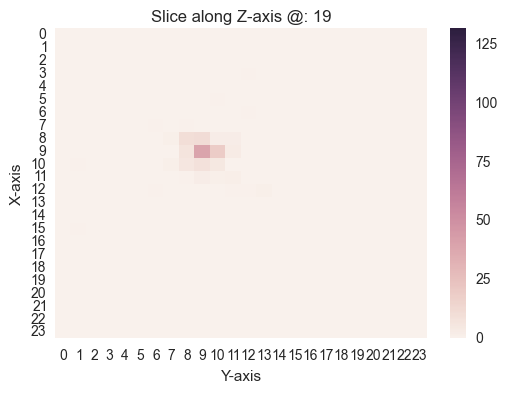

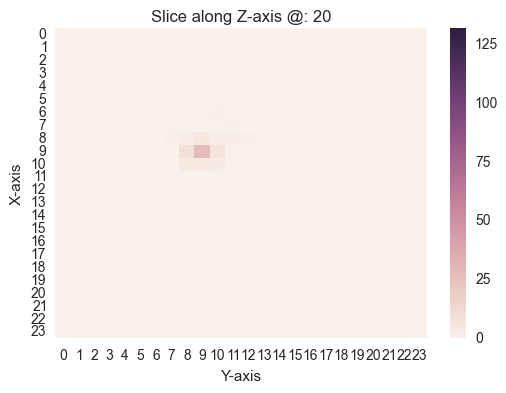

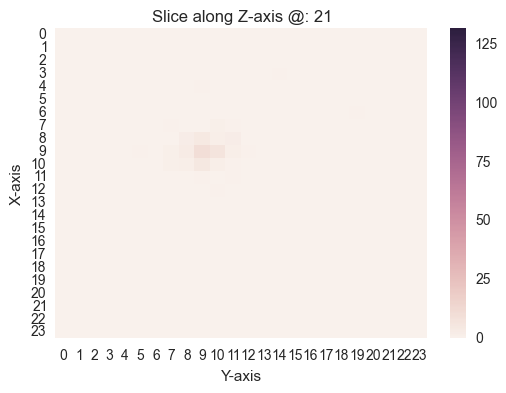

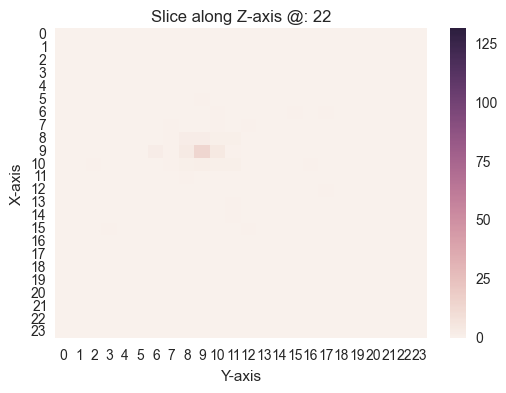

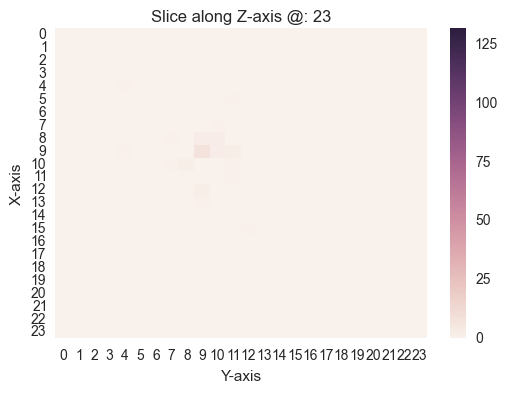

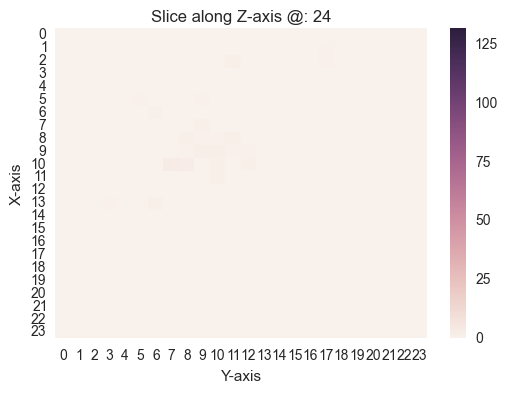

In [112]:
viz_tools.slice_axis_heatmap(single_0, 2, scaling_root=1)

#### Conclusions:
The is a lot of variation between single experiments, but looking at experiment averages help us visualize the showers better.  

In this early visual analysis, we did not find any strong differences in the shower data across the particle types.  
Looking at total energy generated, the distribution across each particle-specific sample looks similar, but the variability in this quantity is large. The mean amount of energy measured in an experiment in ~4500, but has a std deviation of 2500!  This leads us to be hypothesize that much of the variation across experiments is coming for the momentum target data, which we will explore in the proceeding notebook.  

By looking at the 2D (collapsed axis) heatmaps, we note that the shower "comes in" around (x=9,y=9) and never reaches index locations [20:23] in either the X or Y axes. This should be kept in mind throughout the analysis, and will make the dimension of the problem significantly smaller (24*24*25) --> (20*20*25)